# Datenanalyse mit KI & Machine Learning
## Feature Engineering

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [5]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [105]:
# Prüfung fehlender Werte:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [106]:
diamonds.index

RangeIndex(start=0, stop=53940, step=1)

In [107]:
start = diamonds.index.start
start

0

In [108]:
stop = diamonds.index.stop
stop

53940

In [109]:
# Quizfrage: Was bedeutet replace=False hier?
missing_indices = np.random.choice(range(stop), 1000, replace=False)
missing_indices

array([26797, 52411, 29462, 24724, 53630, 39632, 45577, 43803, 17233,
        9203, 22206, 11997, 36945, 19925,  4234, 10170, 37876, 37913,
       23971, 25200, 30967, 30735, 28916, 46268, 15314, 10695, 12975,
       15050, 52218, 43332, 21727, 21773,  1228, 22380, 22627, 53285,
       36008, 22869, 23278, 30736, 36807,  9416, 45476, 15664, 39719,
       33541, 32674, 29440, 37498, 10480, 12087, 50447, 13360, 41002,
        4389, 35146, 49965,  9836, 28611, 25138, 32599, 53593,  5017,
        9842, 32434, 33842, 35781, 50937, 49408,  6246, 31019, 21343,
       17838, 48119,  2260, 53639, 51767, 10192, 34127, 27781,  3642,
       34097, 19635, 33138, 24710, 24381, 52004, 40007, 30128,  3818,
       44016, 36440, 25020,  6230, 34407, 47346, 46343, 51795, 33980,
       46506, 17481, 24914, 36872, 14847,  9040, 26077, 52393, 34329,
       43386, 19134, 37034, 26259,  3694, 25509, 25540, 25144, 12521,
       19858, 14524, 44551, 52257, 38144, 34776,  4719, 13109, 31644,
       44332, 15827,

In [110]:
len(missing_indices)

1000

In [111]:
# Fehlende Werte anhand der Indices in Spalte y einfügen:
diamonds.loc[missing_indices, 'y'] = np.nan

In [112]:
diamonds.loc[missing_indices, 'y']

26797   NaN
52411   NaN
29462   NaN
24724   NaN
53630   NaN
         ..
2033    NaN
2298    NaN
14570   NaN
12486   NaN
50168   NaN
Name: y, Length: 1000, dtype: float64

In [113]:
diamonds.isna().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y          1000
z             0
dtype: int64

In [114]:
# Wiederholung für Spalte depth:
missing_indices = np.random.choice(range(stop), 1000, replace=False)
diamonds.loc[missing_indices, 'depth'] = np.nan

In [115]:
diamonds.isna().sum()

carat         0
cut           0
color         0
clarity       0
depth      1000
table         0
price         0
x             0
y          1000
z             0
dtype: int64

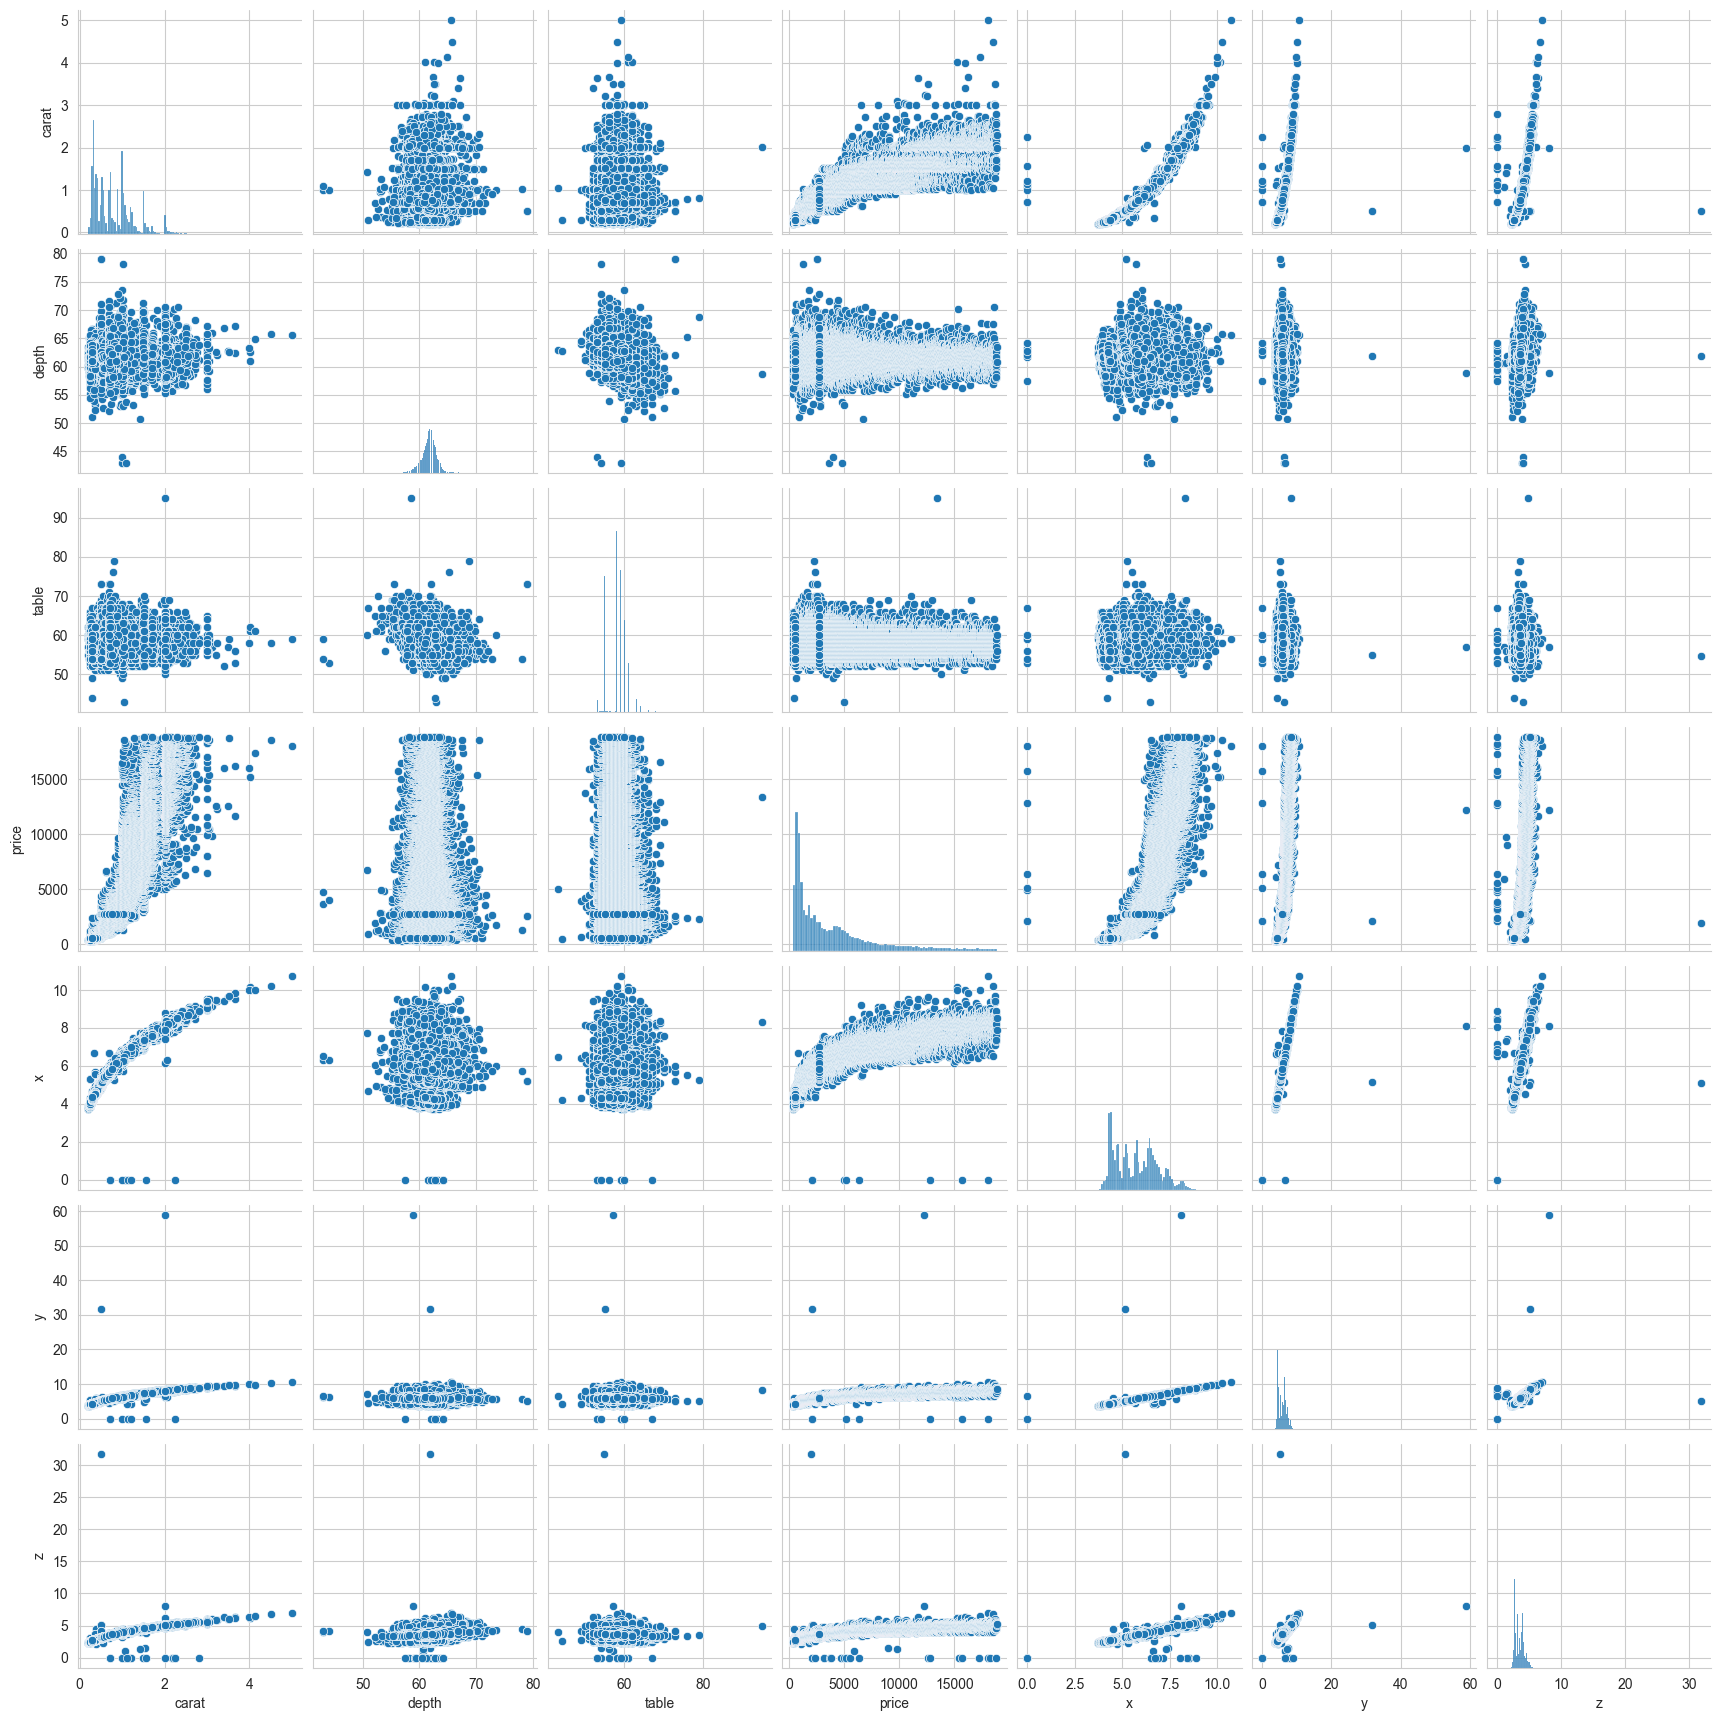

In [116]:
# Übersicht über die Daten verschaffen (Achtung, dauert einen Moment)
sns.pairplot(diamonds)
plt.show()

# Ziel soll es sein, die Variable x möglichst genau mit Hilfe eines Modells vorherzusagen
## Bevor wir damit anfangen, müssen wir uns zuerst um die Aufbereitung der Daten kümmern.
### 1. Fehlende Werte
#### Fehlende Werte in der Spalte depth

In [117]:
# Indices von fehlenden Werten in Spalte depth:
depth_nans = diamonds[diamonds['depth'].isna()].index
depth_nans

Index([   15,    22,   108,   139,   244,   279,   295,   458,   472,   519,
       ...
       53347, 53400, 53541, 53594, 53618, 53620, 53684, 53697, 53820, 53857],
      dtype='int64', length=1000)

In [118]:
# Überprüfen, ob wirklich nur fehlende Werte im Ausschnitt vorkommen:
print("Vorkommende Wert im Datenausschnitt:", diamonds.loc[depth_nans, 'depth'].unique())
print("Anzahl dieser Werte:", len(diamonds.loc[depth_nans, 'depth']))

Vorkommende Wert im Datenausschnitt: [nan]
Anzahl dieser Werte: 1000


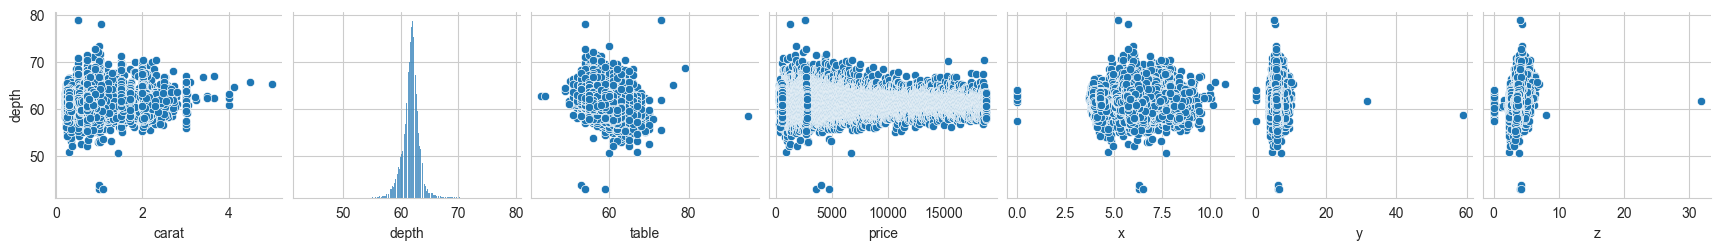

In [119]:
# Wie sieht die Abhängigkeit von depth zu anderen Features aus?
sns.pairplot(data=diamonds, y_vars='depth')
plt.show()

In [120]:
# Scheint kein deutlicher Zusammenhang zwischen anderen Features und depth vorhanden
# depth aber recht normalverteilt mit recht enger Verteilung
# --> Auffüllen mit Median hier eine Möglichkeit
# Median prüfen
diamonds['depth'].median()

np.float64(61.8)

In [121]:
# Auffüllen mit Medianwert mithilfe von Simple Imputer:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
diamonds['depth'] = imputer.fit_transform(diamonds[['depth']])

In [122]:
# Überprüfen nach Imputation:
print("Vorkommende Werte im Ausschnitt:", diamonds.loc[depth_nans, 'depth'].unique())
print("Anzahl Zeilen/Werte:", len(diamonds.loc[depth_nans, 'depth']))

Vorkommende Werte im Ausschnitt: [61.8]
Anzahl Zeilen/Werte: 1000


In [123]:
# Übriggenbliebene fehlende Werte:
diamonds.isna().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y          1000
z             0
dtype: int64

#### Fehlende Werte in der Spalte y

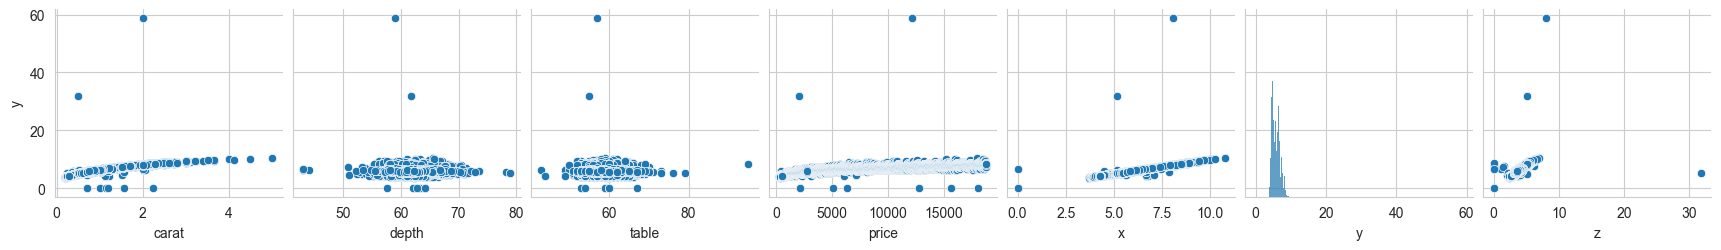

In [124]:
# Wie sieht die Abhängigkeit von y mit anderen Features aus?
sns.pairplot(data=diamonds, y_vars='y')
plt.show()

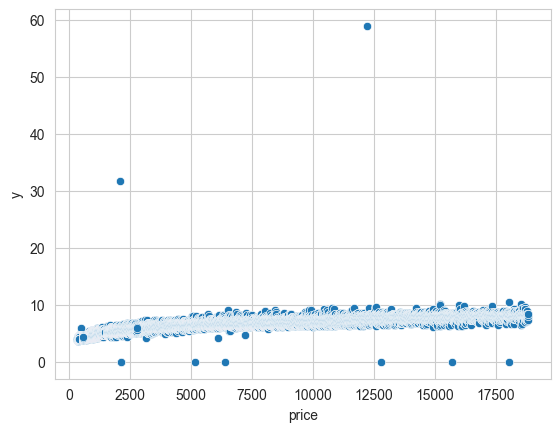

In [125]:
# Mit Price lässt sich eine lineare Regression erstellen
sns.scatterplot(data=diamonds, x="price", y="y")
plt.show()

In [126]:
diamonds_lm = diamonds.dropna()
X = diamonds_lm [['price']]
y = diamonds_lm['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [127]:
lm = LinearRegression()
lm.fit(X_train.values, y_train.values)

LinearRegression()

In [128]:
lm.score(X_train.values, y_train.values)

0.7488077014470109

In [129]:
lm.score(X_test.values, y_test.values)

0.7457658061291357

In [130]:
diamonds[diamonds['y'].isna()]['price'].values.reshape(-1, 1).ndim

2

In [131]:
X_to_predict = diamonds[diamonds['y'].isna()]['price'].values.reshape(-1, 1)
predicted_y = lm.predict(X_to_predict)
predicted_y

array([4.84245032, 4.85854644, 4.85854644, 4.89569132, 5.44617845,
       5.45063584, 5.45335979, 5.45484559, 4.89593895, 5.45484559,
       5.45608375, 5.45979824, 5.46004587, 5.4625222 , 4.89643422,
       5.46648432, 5.46846538, 5.46945591, 5.47217987, 5.47564672,
       5.48654256, 5.48654256, 5.49149521, 4.89692948, 4.89717711,
       5.49397153, 5.49743839, 5.50833422, 5.50957238, 5.51006765,
       5.52443033, 5.52740192, 5.53086878, 5.53730723, 5.53829776,
       5.53928829, 5.54151698, 5.5454791 , 5.55290808, 5.55835599,
       5.56157521, 5.56231811, 5.56974709, 5.57544264, 5.57643317,
       5.5964914 , 5.5972343 , 5.60367275, 5.60961593, 5.60986356,
       5.61209225, 5.61308278, 4.89940581, 4.89965344, 5.61456858,
       5.61555911, 5.61654964, 5.61729254, 5.62001649, 5.62249282,
       5.62447388, 5.62992179, 5.63066469, 5.64081763, 5.64106526,
       5.64354158, 5.64502738, 5.6482466 , 4.89990107, 4.89990107,
       5.65344689, 5.65518031, 5.66706668, 5.66706668, 5.66780

In [139]:
diamonds.loc[diamonds['y'].isna(), 'y']

10      NaN
48      NaN
50      NaN
77      NaN
198     NaN
         ..
53829   NaN
53844   NaN
53920   NaN
53921   NaN
53930   NaN
Name: y, Length: 1000, dtype: float64

In [140]:
diamonds.loc[diamonds['y'].isna(), 'y'] = predicted_y

In [141]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Alle NaN sind nun beseitigt

### 2. Haben wir falsche Ausreißer?

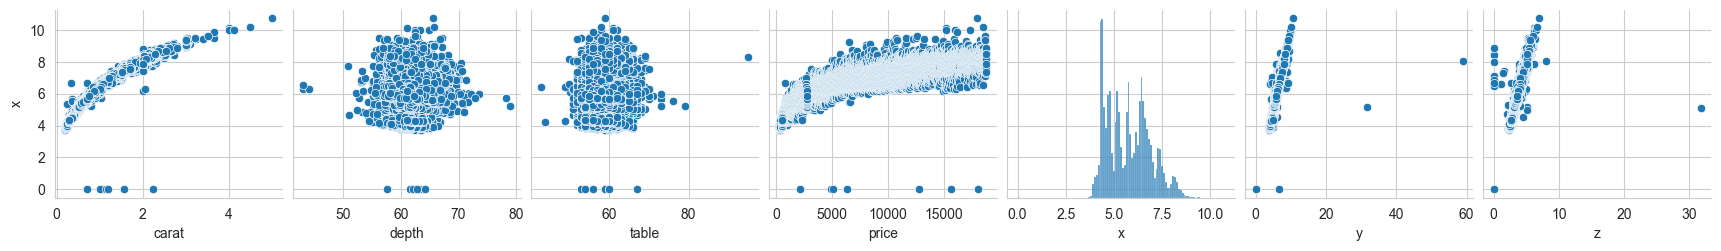

In [142]:
# Fällt uns etwas auf?
sns.pairplot(data=diamonds, y_vars="x")
plt.show()

In [143]:
diamonds.sort_values('x')

,carat,cut,color,clarity,depth,table,price,x,y,z
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


#### Offenbar gibt es ein paar Einträge mit x=0. Das sind definitiv falsche Ausreißer. Das Gleiche gilt für y und z.

In [144]:
zeros_index = diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)].index
zeros_index

Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951, 24394,
       24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556, 49557, 51506],
      dtype='int64')

In [145]:
diamonds.drop(index=zeros_index, inplace=True)

In [146]:
diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


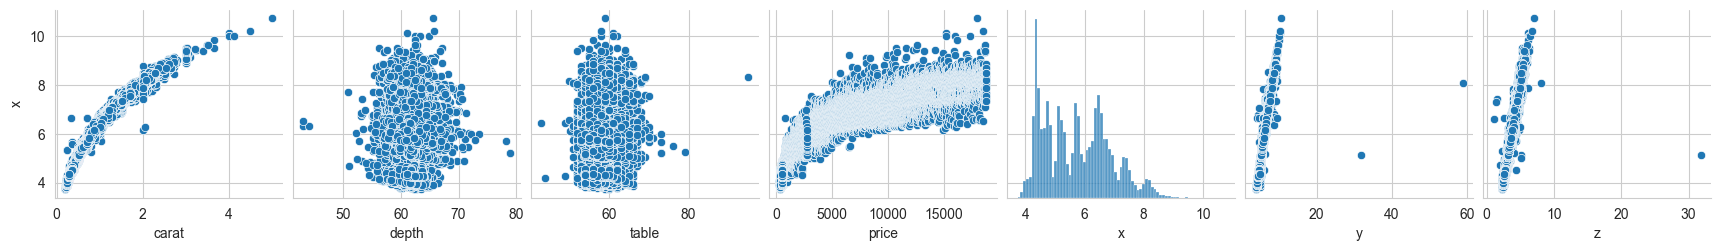

In [147]:
# Sieht besser aus!
sns.pairplot(diamonds, y_vars="x")
plt.show()

### 3. Welche Features sind für uns relevant?

In [148]:
# Entscheidung anhand der Korrelationsmatrix
correlation_matrix = diamonds.select_dtypes('number').corr()
correlation_matrix

,carat,depth,table,price,x,y,z
carat,1.000000,0.028192,0.181646,0.921592,0.977779,0.952853,0.961048
depth,0.028192,1.000000,-0.292864,-0.010580,-0.024887,-0.028773,0.094108
table,0.181646,-0.292864,1.000000,0.127245,0.196097,0.183200,0.152483
price,0.921592,-0.010580,0.127245,1.000000,0.887231,0.869459,0.868206
x,0.977779,-0.024887,0.196097,0.887231,1.000000,0.972911,0.975435
y,0.952853,-0.028773,0.183200,0.869459,0.972911,1.000000,0.954802
z,0.961048,0.094108,0.152483,0.868206,0.975435,0.954802,1.000000


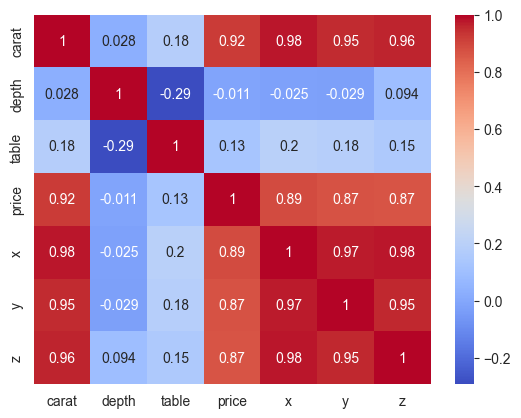

In [149]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Für die Vorhersage von x sind vor allem carat, price, y und z wichtig

In [150]:
# Für den Fall, dass wir die Anzahl der features minimieren müssen: 
# RFE gibt uns automatisch die n besten features zurück
# (RFE steht für "Recursive Feature Elimination")

X = diamonds.select_dtypes('number').drop('x', axis=1)
y = diamonds['x']

estimator = LinearRegression()
rfe_selector = RFE(estimator=estimator, n_features_to_select=4)
rfe_selector.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [151]:
# rfe_selector.support_ enthält numerische Indices der Spalten mit Booleans
# True steht für Spalten, die RFE gewählt hat, False für eliminierte Spalten
rfe_selector.support_

array([ True,  True, False, False,  True,  True])

In [152]:
rfe_selector.feature_names_in_

array(['carat', 'depth', 'table', 'price', 'y', 'z'], dtype=object)

In [153]:
list(zip(rfe_selector.feature_names_in_, rfe_selector.support_))

[('carat', np.True_),
 ('depth', np.True_),
 ('table', np.False_),
 ('price', np.False_),
 ('y', np.True_),
 ('z', np.True_)]

In [154]:
# Wenn man sich bei X.columns die Indices vorstellt, dann ist 'carat' an Position 0 und 'z' an Position 5
X.columns

Index(['carat', 'depth', 'table', 'price', 'y', 'z'], dtype='object')

In [155]:
# Das hielt RFE für die vier wichtigsten Variablen:
X.columns[rfe_selector.support_]
# depth ist dabei aber eigentlich nicht so gut!

Index(['carat', 'depth', 'y', 'z'], dtype='object')

### 4. Welche Zusammenhänge sehen wir in unseren Daten?

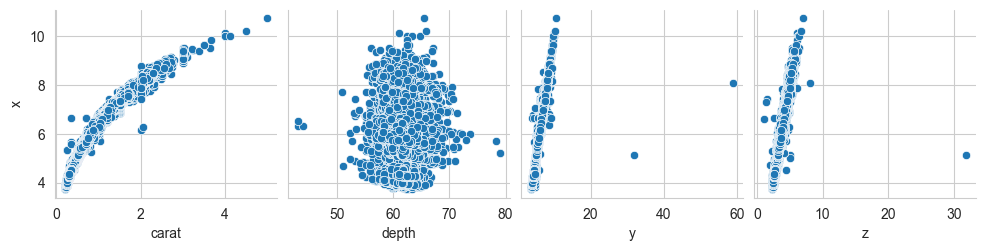

In [162]:
# Wie hängt x mit den ausgewählten Features zusammen?
sns.pairplot(diamonds, y_vars="x", x_vars=X.columns[rfe_selector.support_])
plt.show()

#### Für y und z sehen wir lineare Zusammenhänge. Carat und price sind eher kurvig.

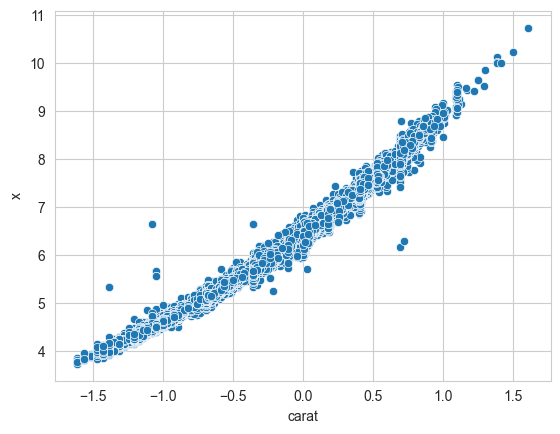

In [163]:
# Depth scheint nicht richtig zu sein
# Vielleict hilft eine log-Transformation von carat und price?
sns.scatterplot(x=np.log(diamonds['carat']), y=diamonds['x'])
plt.show()

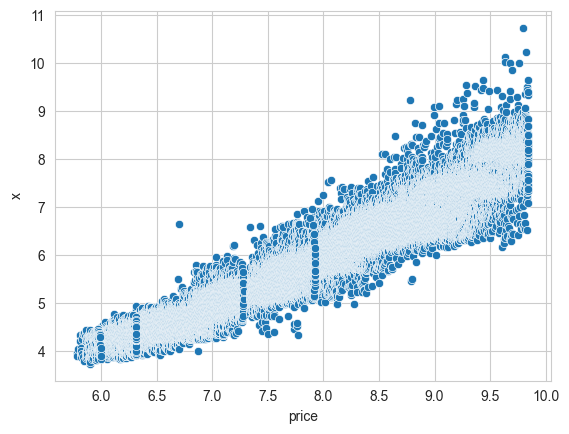

In [164]:
sns.scatterplot(y=diamonds["x"], x=np.log(diamonds["price"]))
plt.show()

In [165]:
diamonds['price'] = np.log(diamonds["price"])

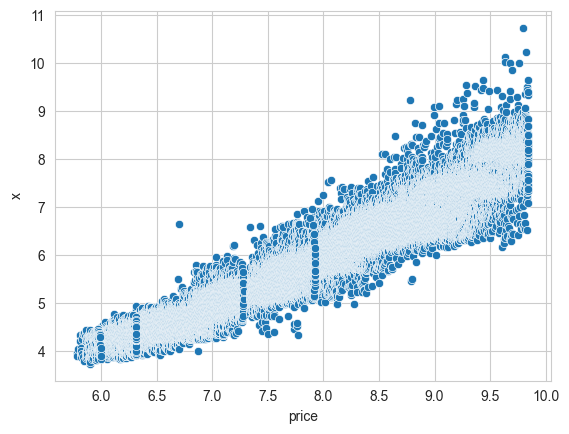

In [166]:
sns.scatterplot(y=diamonds["x"], x=diamonds["price"])
plt.show()

In [167]:
diamonds.select_dtypes('number')

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,59.8,61.0,5.786897,3.89,3.84,2.31
2,0.23,56.9,65.0,5.789960,4.05,4.07,2.31
3,0.29,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,63.3,58.0,5.814131,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,7.921898,5.75,5.76,3.50
53936,0.72,63.1,55.0,7.921898,5.69,5.75,3.61
53937,0.70,62.8,60.0,7.921898,5.66,5.68,3.56
53938,0.86,61.0,58.0,7.921898,6.15,6.12,3.74


In [168]:
# Zweiter Durchlauf RFE nach Transformation von 'price'

X = diamonds.select_dtypes('number').drop('x', axis=1)
y = diamonds['x']

estimator = LinearRegression()
rfe_selector = RFE(estimator=estimator, n_features_to_select=4)
rfe_selector.fit(X, y)
selected_features = X.columns[rfe_selector.support_]
selected_features

Index(['carat', 'price', 'y', 'z'], dtype='object')

#### Daten sehen jetzt ungefähr linear aus, sehr gut!
## Genug der Vorbereitung, Zeit für die Erstellung des Modells

In [169]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,5.786897,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,5.789960,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,5.814131,4.34,4.35,2.75


In [170]:
X = diamonds[selected_features]
y = diamonds['x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [171]:
X_train.head()

,carat,price,y,z
23393,0.36,6.447306,4.62,2.82
19724,1.09,9.023408,6.66,4.06
20160,1.02,9.061376,6.56,3.96
47407,0.52,7.522400,5.06,3.29
30740,0.43,6.605298,4.84,3.04


In [172]:
X_train['carat'] = np.log(X_train['carat'])

In [173]:
X_train.head()

,carat,price,y,z
23393,-1.021651,6.447306,4.62,2.82
19724,0.086178,9.023408,6.66,4.06
20160,0.019803,9.061376,6.56,3.96
47407,-0.653926,7.522400,5.06,3.29
30740,-0.843970,6.605298,4.84,3.04


In [174]:
# Skalieren mit MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[0.18249292, 0.16282512, 0.01702282, 0.25035765],
       [0.52644583, 0.79796863, 0.05396595, 0.42775393],
       [0.50583805, 0.80732972, 0.05215502, 0.41344778],
       ...,
       [0.4019801 , 0.60400043, 0.03821079, 0.36051502],
       [0.50583805, 0.68202283, 0.04871423, 0.42060086],
       [0.15547808, 0.22561073, 0.0144875 , 0.23748212]])

In [175]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [176]:
model.score(X_train, y_train)

0.9897307470760461

In [177]:
# Problem entdeckt: 
model.score(X_test.values, y_test.values)

-3257.5109312561185

In [178]:
X_train

array([[0.18249292, 0.16282512, 0.01702282, 0.25035765],
       [0.52644583, 0.79796863, 0.05396595, 0.42775393],
       [0.50583805, 0.80732972, 0.05215502, 0.41344778],
       ...,
       [0.4019801 , 0.60400043, 0.03821079, 0.36051502],
       [0.50583805, 0.68202283, 0.04871423, 0.42060086],
       [0.15547808, 0.22561073, 0.0144875 , 0.23748212]])

In [179]:
# Problem: X_test ist nicht so skaliert wie X_train 
X_test

,carat,price,y,z
39941,0.28,6.198479,4.24,2.59
52993,1.29,7.861727,6.59,4.50
25504,1.52,9.567665,7.46,4.51
29531,0.37,6.555357,4.69,2.85
35223,0.33,6.794587,4.52,2.76
...,...,...,...,...
51949,0.71,7.800163,5.62,3.59
23690,2.19,9.372119,8.19,5.23
558,0.75,7.948385,5.87,3.59
7014,0.90,8.332789,6.09,3.87


### Bevor wir unsere Testdaten auch testen können, müssen wir sie ebenso vorbehandeln

In [180]:
# Es müssen unbedingt auch die Testdaten in derselben Skalierung vorliegen!
# Bringen wir sie dahin!

X_test['carat'] = np.log(X_test['carat'])

In [181]:
# Skalieren mit MinMaxScaler
X_test = scaler.transform(X_test)
X_test

array([[0.10446613, 0.10147625, 0.01014125, 0.21745351],
       [0.57874981, 0.51155368, 0.0526983 , 0.490701  ],
       [0.62968882, 0.93215632, 0.06845346, 0.49213162],
       ...,
       [0.41037182, 0.53291944, 0.03965954, 0.36051502],
       [0.46697806, 0.62769511, 0.04364361, 0.40057225],
       [0.56647649, 0.66252983, 0.05704455, 0.45779685]])

In [182]:
model.score(X_test, y_test)

0.9769065193602217

# Wir haben super Scores für unser Modell bekommen!